In [40]:
import geopandas as gpd
import pandas as pd
import numpy as np
import contextily as ctx
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
import pygris

pd.set_option('display.max_columns', None)

In [2]:
china = gpd.read_file("https://biogeo.ucdavis.edu/data/gadm3.6/shp/gadm36_CHN_shp.zip")
germany = gpd.read_file("https://biogeo.ucdavis.edu/data/gadm3.6/shp/gadm36_DEU_shp.zip")
uk = gpd.read_file("https://biogeo.ucdavis.edu/data/gadm3.6/shp/gadm36_GBR_shp.zip")
brazil = gpd.read_file("https://biogeo.ucdavis.edu/data/gadm3.6/shp/gadm36_BRA_shp.zip")

In [3]:
beijing = Point(116.4074, 39.9042)
munich = Point(11.5820, 48.1351)
manchester = Point(-2.2426, 53.4808)
rio = Point(-43.1729, -22.9068)

city_geoms = [beijing, manchester, munich, rio]

cities = (
    gpd.GeoDataFrame(
        {
            'city': [
                'Beijing', 
                'Manchester',
                'Munich',
                'Rio de Janeiro'
                ],
            'label': [
                'A', 
                'B', 
                'C', 
                'D'
                ]}, 
        geometry=city_geoms,
        crs="EPSG:4269"
    )
)

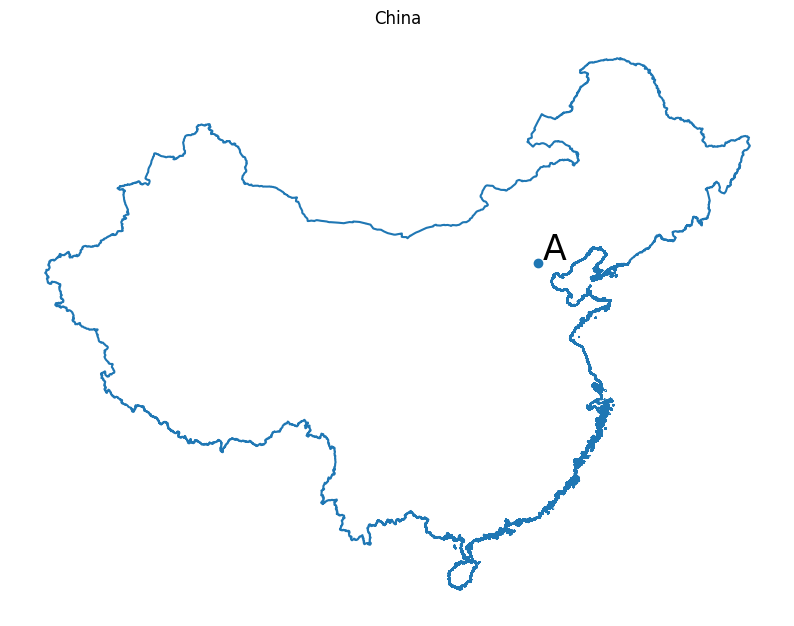

In [4]:
fig, ax = plt.subplots(figsize=(10,10))

china.geometry.boundary.plot(ax=ax)

china_cities = (
    cities
    .loc[cities['label'] == "A"]
    .to_crs(china.crs)
)

china_cities.plot(ax=ax)

for x, y, label in zip(china_cities.geometry.x, china_cities.geometry.y, china_cities.label):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=25)

ax.set_axis_off()
plt.title("China")
plt.show()

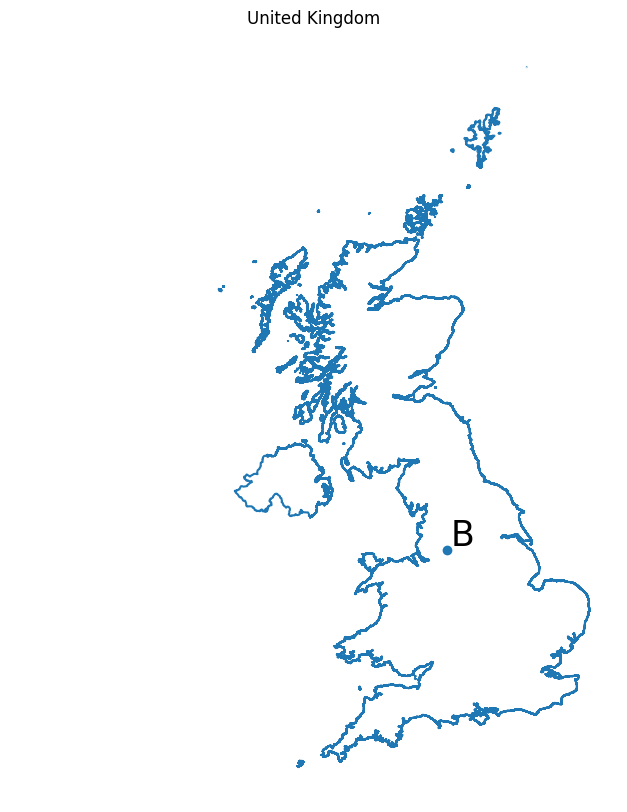

In [5]:
fig, ax = plt.subplots(figsize=(10,10))

uk.geometry.boundary.plot(ax=ax)

uk_cities = (
    cities
    .loc[cities['label'] == "B"]
    .to_crs(uk.crs)
)

uk_cities.plot(ax=ax)

for x, y, label in zip(uk_cities.geometry.x, uk_cities.geometry.y, uk_cities.label):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=25)

ax.set_axis_off()
plt.title("United Kingdom")
plt.show()

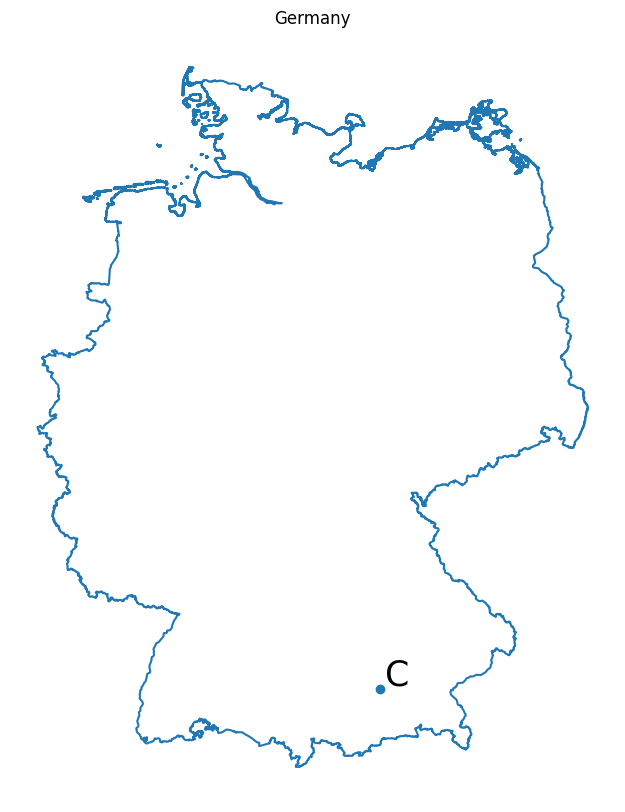

In [6]:
fig, ax = plt.subplots(figsize=(10,10))

germany.geometry.boundary.plot(ax=ax)

german_cities = (
    cities
    .loc[cities['label'] == "C"]
    .to_crs(germany.crs)
)

german_cities.plot(ax=ax)

for x, y, label in zip(german_cities.geometry.x, german_cities.geometry.y, german_cities.label):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=25)

ax.set_axis_off()
plt.title("Germany")
plt.show()

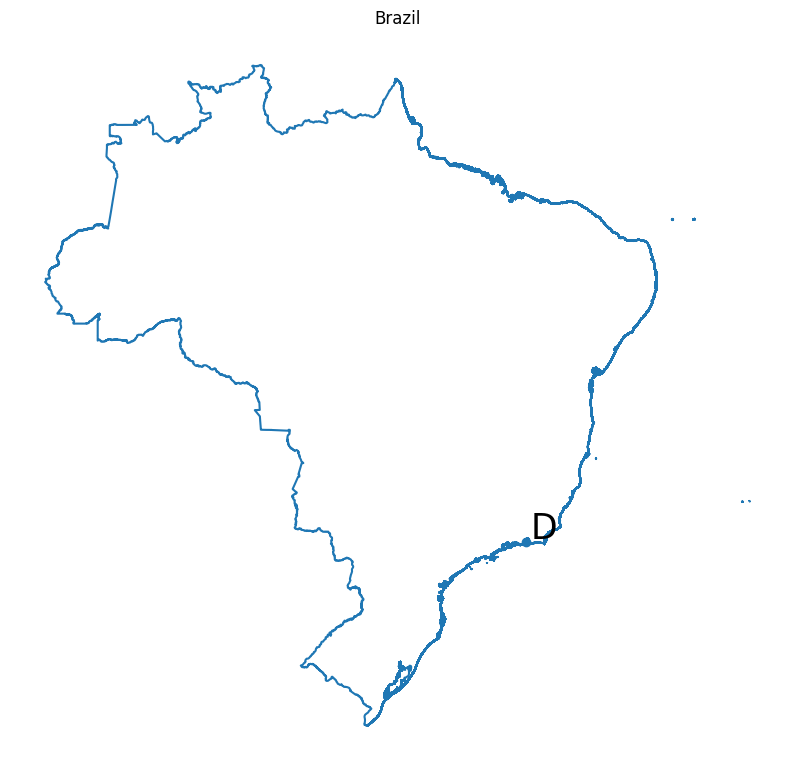

In [7]:
fig, ax = plt.subplots(figsize=(10,10))

brazil.geometry.boundary.plot(ax=ax)

brazil_cities = (
    cities
    .loc[cities['label'] == "D"]
    .to_crs(brazil.crs)
)

brazil_cities.plot(ax=ax)

for x, y, label in zip(brazil_cities.geometry.x, brazil_cities.geometry.y, brazil_cities.label):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=25)

ax.set_axis_off()
plt.title("Brazil")
plt.show()

In [62]:
file = open('governors.txt', 'r')
lines = file.readlines()

not_states = [
    "American Samoa",
    "Guam",
    "Commonwealth of the Northern Mariana Islands",
    "District of Columbia",
    "Puerto Rico",
    "United States Virgin Islands"
    
]

us_states = (
    pygris.states()
    .loc[lambda df_: ~df_['NAME'].isin(not_states)]
    .sort_values('NAME')
    .assign(raw_gov=lines)
    .assign(republican=lambda df_: df_['raw_gov'].str.contains("Republican"))
    .assign(party=lambda df_: df_['republican'].map({True: "Republican", False: "Democrat"}))
    .assign(color_=lambda df_: df_['party'].map({"Democrat": "#F953D2", "Republican": "#5634D9"}))
    [['NAME', 'party', 'color_', 'geometry']]
)

Using the default year of 2021


/opt/anaconda3/envs/bart/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


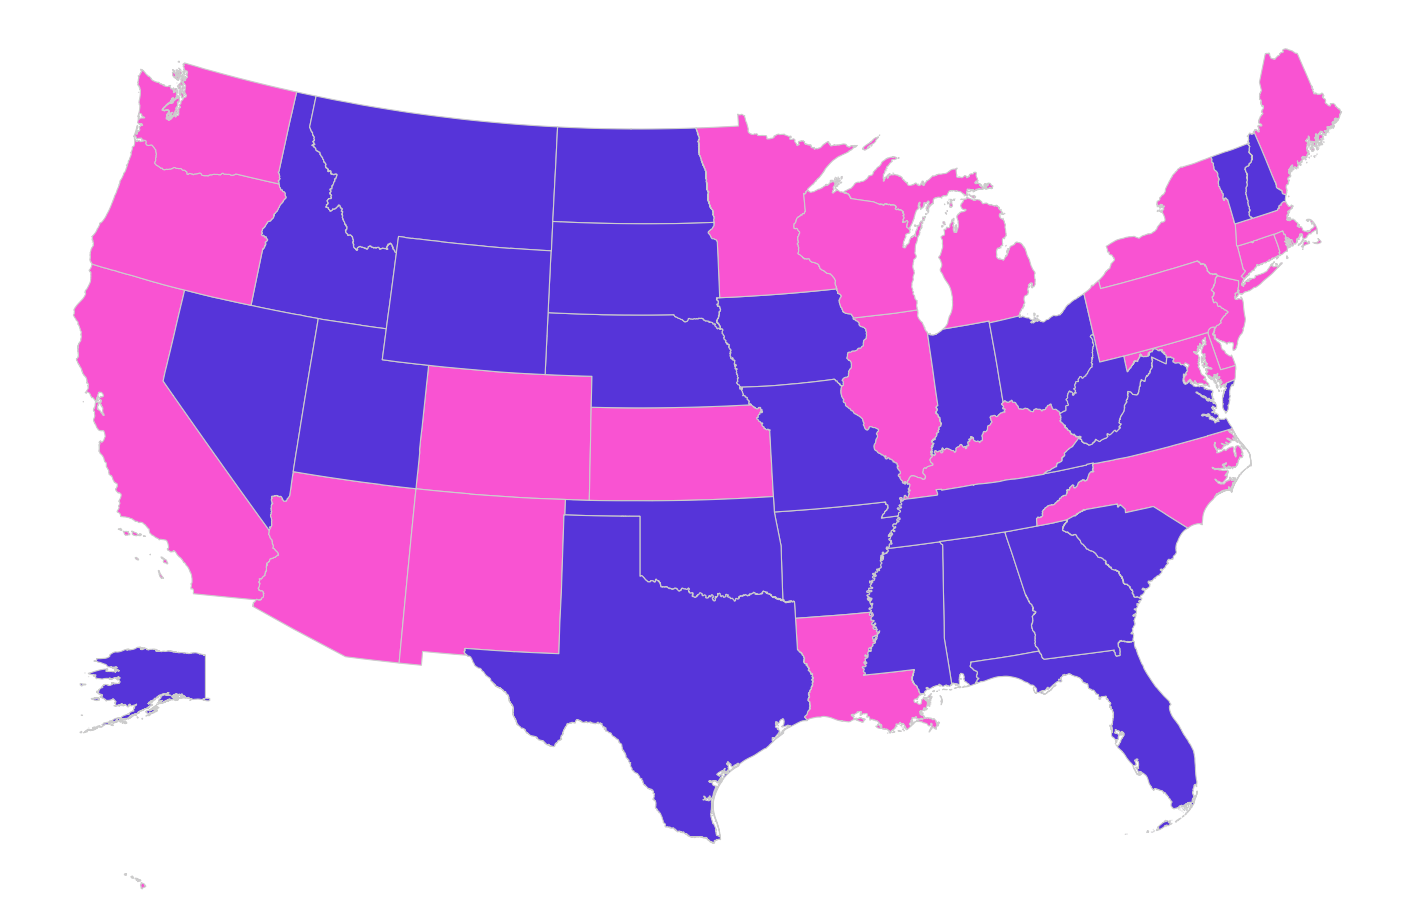

In [63]:
# Create a "copy" of gdf for re-projecting
visframe = us_states.to_crs({'init':'epsg:2163'})

# create figure and axes for with Matplotlib for main map
fig, ax = plt.subplots(1, figsize=(18, 14))
# remove the axis box from the main map
ax.axis('off')

(
    visframe
    [~visframe.NAME.isin(['Hawaii','Alaska'])]
    .pipe(lambda df_:
        df_
        .plot(color=df_["color_"], linewidth=0.8, ax=ax, edgecolor='0.8')      
    )
    
)

akax = fig.add_axes([0.1, 0.17, 0.2, 0.19])   
akax.axis('off')

polygon = Polygon([(-170,50),(-170,72),(-140, 72),(-140,50)])
alaska_gdf = us_states[us_states.NAME=='Alaska']

(
    alaska_gdf
    .clip(polygon)
    .pipe(lambda df_: 
          df_.plot(color=df_["color_"], linewidth=0.8,ax=akax, edgecolor='0.8'))
          )
    

hiax = fig.add_axes([.28, 0.20, 0.1, 0.1])   
hiax.axis('off')

hipolygon = Polygon([(-160,0),(-160,90),(-120,90),(-120,0)])
hawaii_gdf = us_states[us_states.NAME=='Hawaii']

(
    hawaii_gdf
    .clip(hipolygon)
    .pipe(lambda df_: 
          df_.plot(color=df_["color_"], linewidth=0.8, ax=akax, edgecolor='0.8')
    )
)

plt.show()
